In [34]:
pip install image_similarity_measures

     |████████████████████████████████| 2.6 MB 11.3 MB/s 
     |████████████████████████████████| 19.3 MB 10.6 MB/s 
  Created wheel for phasepack: filename=phasepack-1.5-py3-none-any.whl size=26983 sha256=59e138223a91d916472624ce93a8b7cefa51729bdc98afd8b90a97cc5e97836e
  Stored in directory: /root/.cache/pip/wheels/39/5c/b3/79292d7ac3f088e858805b5515b45cf5a365106397d936caf1
Successfully built phasepack


In [35]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from time import time
import cv2
import os
import image_similarity_measures
from sys import argv
from image_similarity_measures.quality_metrics import rmse, ssim, sre, issm, sam, uiq, fsim, psnr
np.random.seed(100)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


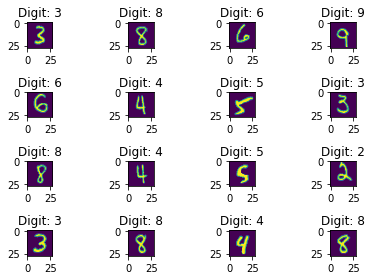

In [3]:
fig = plt.figure()
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(X_train[50000+i])
  plt.title(f"Digit: {y_train[50000+i]}")

In [4]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
X_train = X_train / 255
X_test = X_test / 255
toHaveIt = X_test.copy()

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [7]:
y_test = np_utils.to_categorical(y_test, 10)
y_train = np_utils.to_categorical(y_train, 10)

In [8]:
model = Sequential()
model.add(Dense(300, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


In [9]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Nadam')

In [10]:
his = model.fit(X_train, y_train, batch_size = 100, epochs=10, validation_data=(X_test, y_test)) 

Epoch 1/10
600/600 [==============================] - 17s 4ms/step - loss: 0.5058 - accuracy: 0.8523 - val_loss: 0.1121 - val_accuracy: 0.9660
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1203 - accuracy: 0.9642 - val_loss: 0.0812 - val_accuracy: 0.9748
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0819 - accuracy: 0.9748 - val_loss: 0.0715 - val_accuracy: 0.9781
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0659 - accuracy: 0.9801 - val_loss: 0.0646 - val_accuracy: 0.9782
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0529 - accuracy: 0.9830 - val_loss: 0.0686 - val_accuracy: 0.9794
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0442 - accuracy: 0.9855 - val_loss: 0.0640 - val_accuracy: 0.9811
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.0613 - val_accuracy: 0.9826
Epoch

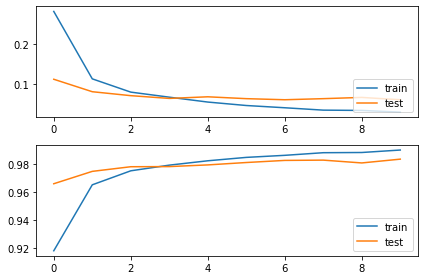

In [11]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(his.history['loss'])
plt.plot(his.history["val_loss"])
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(his.history['accuracy'])
plt.plot(his.history["val_accuracy"])
plt.legend(['train', 'test'], loc='lower right')

plt.tight_layout()

**This is a completely random fuzzer**

In [31]:


class Fuzzer:
  def __init__(self, epsilon, image, imageLabel, model):
    self.model = model
    self.epsilon = epsilon
    self.image = image
    self.modifiedImage = self.image
    self.imageLabel = imageLabel
    self.time = 0
    self.t1 = 0
    self.t2 = 0

  def randomDirection(self):
    pass

  def generate(self):
    self.t1 = time()
    for i in (range(50000)):
      self.randomDirection()
      newID = np.argmax(self.model.predict(np.array(self.modifiedImage).reshape(-1, 784)))
      oldID = np.argmax(self.imageLabel)
      if (newID != oldID):
        print(f'We found it in iteration number {i}')
        print(f"new ID: {newID}")
        print(f"old ID: {oldID}")
        
        self.t2 = time()
        self.time= self.t2 - self.t1
        break
  def plot(self, fuzzerName):
    fig = plt.figure()
    fig.suptitle(f"{fuzzerName}", fontsize=16)
    plt.subplot(1,2,1)
    plt.tight_layout()
    plt.imshow(np.reshape(self.modifiedImage, newshape=(28,28)))
    plt.title(f"My new distorted picture")
    plt.subplot(1,2,2)
    plt.tight_layout()
    plt.imshow(np.reshape(self.image, newshape=(28,28)))
    plt.title(f"My original picture")

class CompeletlyRandomSSIM(Fuzzer):
  def __init__(self, epsilon, image, imageLabel, model):
    super().__init__(epsilon= epsilon, image= image, imageLabel = imageLabel, model = model)
    self.similarity1 = 1
    self.similarity2 = 0
  
  def randomDirection(self):
    while (1):
      vec = np.random.randint(-1, 2, 784)
      tempImage = self.modifiedImage
      self.modifiedImage += self.epsilon * vec
      self.modifiedImage = np.clip(self.modifiedImage, 0, 1)

      self.similarity2 = ssim(np.reshape(self.modifiedImage, (28, 28)), np.reshape(self.image, (28, 28)))

      if self.similarity2 > self.similarity1:
        self.modifiedImage = tempImage
        continue
      else:
        self.similarity1 = self.similarity2
        break

class laplaceRandomSSIM(Fuzzer):
  def __init__(self, epsilon, image, imageLabel, model):
    super().__init__(epsilon= epsilon, image= image, imageLabel = imageLabel, model = model)
    self.similarity1 = 1
    self.similarity2 = 0
  
  def randomDirection(self):
    while (1):
      vec = np.random.laplace(0, self.epsilon, 784)
      tempImage = self.modifiedImage
      self.modifiedImage += vec
      self.modifiedImage = np.clip(self.modifiedImage, 0, 1)

      self.similarity2 = ssim(np.reshape(self.modifiedImage, (28, 28)), np.reshape(self.image, (28, 28)))

      if self.similarity2 > self.similarity1:
        self.modifiedImage = tempImage
        continue
      else:
        self.similarity1 = self.similarity2
        break

class normalRandomSSIM(Fuzzer):
  def __init__(self, epsilon, image, imageLabel, model):
    super().__init__(epsilon= epsilon, image= image, imageLabel = imageLabel, model = model)
    self.similarity1 = 1
    self.similarity2 = 0
  
  def randomDirection(self):
    while (1):
      vec = np.random.normal(0, self.epsilon, 784)
      tempImage = self.modifiedImage
      self.modifiedImage += vec
      self.modifiedImage = np.clip(self.modifiedImage, 0, 1)

      self.similarity2 = ssim(np.reshape(self.modifiedImage, (28, 28)), np.reshape(self.image, (28, 28)))

      if self.similarity2 > self.similarity1:
        self.modifiedImage = tempImage
        continue
      else:
        self.similarity1 = self.similarity2
        break

class gumbelRandomSSIM(Fuzzer):
  def __init__(self, epsilon, image, imageLabel, model):
    super().__init__(epsilon= epsilon, image= image, imageLabel = imageLabel, model = model)
    self.similarity1 = 1
    self.similarity2 = 0
  
  def randomDirection(self):
    while (1):
      vec = np.random.gumbel(0, self.epsilon, 784)
      tempImage = self.modifiedImage
      self.modifiedImage += vec
      self.modifiedImage = np.clip(self.modifiedImage, 0, 1)

      self.similarity2 = ssim(np.reshape(self.modifiedImage, (28, 28)), np.reshape(self.image, (28, 28)))

      if self.similarity2 > self.similarity1:
        self.modifiedImage = tempImage
        continue
      else:
        self.similarity1 = self.similarity2
        break

class CompeletlyRandom(Fuzzer):
  def randomDirection(self):
    vec = np.random.randint(-1, 2, 784)
    self.modifiedImage += self.epsilon * vec
    self.modifiedImage = np.clip(self.modifiedImage, 0, 1)

class laplaceRandom(Fuzzer):
  def randomDirection(self):
    vec = np.random.laplace(0, self.epsilon, 784)
    self.modifiedImage += vec
    self.modifiedImage = np.clip(self.modifiedImage, 0, 1)

class normalRandom(Fuzzer):
  def randomDirection(self):
    vec = np.random.normal(0, self.epsilon, 784)
    self.modifiedImage += vec
    self.modifiedImage = np.clip(self.modifiedImage, 0, 1)

class gumbelRandom(Fuzzer):
  def randomDirection(self):
    vec = np.random.gumbel(0, self.epsilon, 784)
    self.modifiedImage += vec
    self.modifiedImage = np.clip(self.modifiedImage, 0, 1)

Gumbel random fuzzer:
We found it in iteration number 73
new ID: 2
old ID: 7
It took us 2.529036045074463 seconds
Normal random fuzzer:
We found it in iteration number 1438
new ID: 2
old ID: 7
It took us 48.754719257354736 seconds
Laplace random fuzzer:
We found it in iteration number 1075
new ID: 2
old ID: 7
It took us 36.20331931114197 seconds
Compeletly random fuzzer:
We found it in iteration number 2118
new ID: 2
old ID: 7
It took us 71.38791823387146 seconds


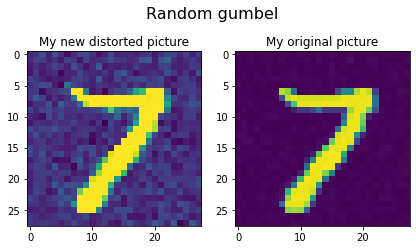

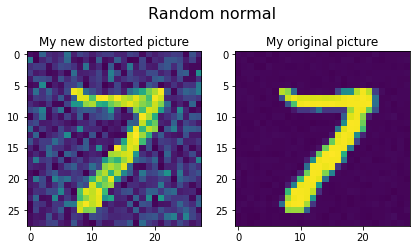

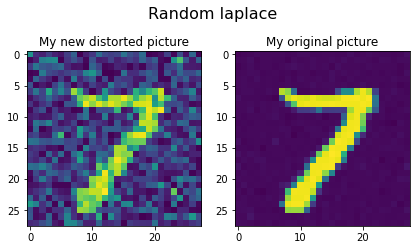

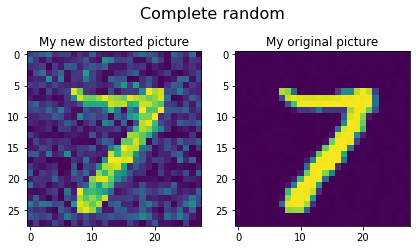

In [29]:
print("Gumbel random fuzzer:")
myFuzz = gumbelRandom(0.005, X_test[34].copy(), y_test[34], model)
myFuzz.generate()
print(f"It took us {myFuzz.time} seconds")
myFuzz.plot("Random gumbel")

print("Normal random fuzzer:")
myFuzz = normalRandom(0.005, X_test[34].copy(), y_test[34], model)
myFuzz.generate()
print(f"It took us {myFuzz.time} seconds")
myFuzz.plot("Random normal")

print("Laplace random fuzzer:")
myFuzz = laplaceRandom(0.005, X_test[34].copy(), y_test[34], model)
myFuzz.generate()
print(f"It took us {myFuzz.time} seconds")
myFuzz.plot("Random laplace")

print("Compeletly random fuzzer:")
myFuzz = CompeletlyRandom(0.005, X_test[34].copy(), y_test[34], model)
myFuzz.generate()
print(f"It took us {myFuzz.time} seconds")
myFuzz.plot("Complete random")

Gumbel random fuzzer + SSIM:
We found it in iteration number 75
new ID: 2
old ID: 7
It took us 2.883629322052002 seconds
Normal random fuzzer + SSIM:
We found it in iteration number 694
new ID: 2
old ID: 7
It took us 33.465691566467285 seconds
Laplace random fuzzer + SSIM:
We found it in iteration number 452
new ID: 2
old ID: 7
It took us 18.678343772888184 seconds
Compeletly random fuzzer + SSIM:
We found it in iteration number 1228
new ID: 2
old ID: 7
It took us 58.44203495979309 seconds


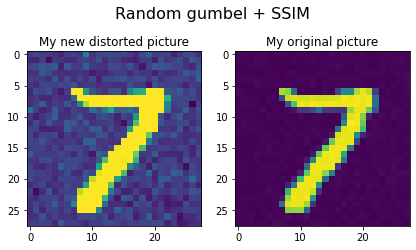

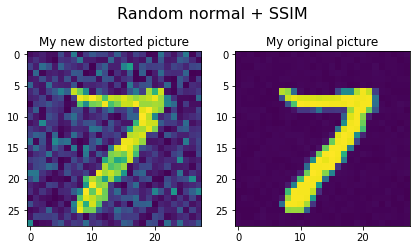

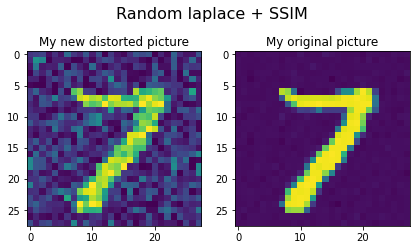

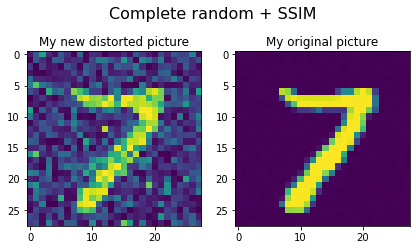

In [37]:
print("Gumbel random fuzzer + SSIM:")
myFuzz = gumbelRandomSSIM(0.005, X_test[34].copy(), y_test[34], model)
myFuzz.generate()
print(f"It took us {myFuzz.time} seconds")
myFuzz.plot("Random gumbel + SSIM")

print("Normal random fuzzer + SSIM:")
myFuzz = normalRandomSSIM(0.005, X_test[34].copy(), y_test[34], model)
myFuzz.generate()
print(f"It took us {myFuzz.time} seconds")
myFuzz.plot("Random normal + SSIM")

print("Laplace random fuzzer + SSIM:")
myFuzz = laplaceRandomSSIM(0.005, X_test[34].copy(), y_test[34], model)
myFuzz.generate()
print(f"It took us {myFuzz.time} seconds")
myFuzz.plot("Random laplace + SSIM")

print("Compeletly random fuzzer + SSIM:")
myFuzz = CompeletlyRandomSSIM(0.005, X_test[34].copy(), y_test[34], model)
myFuzz.generate()
print(f"It took us {myFuzz.time} seconds")
myFuzz.plot("Complete random + SSIM")

**This is a genetic algorithm applied on adversarial attacks**

In [ ]:
class GeneticAdversarial:
  def __init__(self, model, myPic, target , epsilon = 0.005, sizeOfPopulation = 50, numIterations = 5000, mutation = 0.05, elitProportionSize = 0.3):
    self.myPic = myPic
    self.target = target
    self.epsilon = epsilon
    self.image_shape = (int(np.sqrt(np.shape(myPic)[0])), int(np.sqrt(np.shape(myPic)[0])))
    self.image_flattend_size = np.shape(myPic)[0]
    self.sizeOfPopulation = sizeOfPopulation
    self.mutationRate = mutation
    self.elitProportionSize = elitProportionSize
    self.numIterations = numIterations
    self.model = model

  def initiate_populatoin(self):
    my_initial_population = []
    for i in range(self.sizeOfPopulation):
        my_random_direction = np.random.randint(-1,2, self.image_flattend_size)
        my_modified_image = self.myPic + self.epsilon * my_random_direction
        my_initial_population.append(my_modified_image)
    
    return my_initial_population
  
  def fitnessFunction(self, image):
    listOfProbabilities = self.model.predict(np.array(image).reshape(-1, self.image_flattend_size))
    fitnessValue = listOfProbabilities[0][self.target-1]
    return fitnessValue

  def fitness2(self, image):
    return np.argmax(self.model.predict(np.array(image).reshape(-1, self.image_flattend_size)))
  

  def newPopulation(self, oldPopulation):
    newPop = []
    newOld = []
    listOfValues = []
    for index, value in enumerate(oldPopulation):
        ff = self.fitnessFunction(value)
        newOld.append((index, ff))
    
    newOld = sorted(newOld, key = lambda x: x[1], reverse=True)[:int(self.elitProportionSize*len(oldPopulation))]
    for item in newOld:
      newPop.append(oldPopulation[item[0]])

    while (len(oldPopulation) != len(newPop)):
      m = np.random.choice(len(newOld))
      d = np.random.choice(len(newOld))

      mom = oldPopulation[newOld[m][0]]
      dad = oldPopulation[newOld[d][0]]

      child1, child2 = self.crossover(mom, dad)


      if (len(newPop) + 1 <= len(oldPopulation)):
        newPop.append(self.mutate(child1))
      if (len(newPop) + 1 <= len(oldPopulation)):
        newPop.append(self.mutate(child2))

    listOfValues = []

    for index, value in enumerate(newPop):
        ff = self.fitnessFunction(value)

        listOfValues.append(ff)

    return newPop, min(listOfValues)

  def mutate(self, image):
    if np.random.uniform(0, 1) <= self.mutationRate:
      pixels = np.random.randint(0, 100)
      directions = np.random.randint(-1, 2, pixels)
      for index, value in enumerate(directions):
        image[np.random.randint(0, self.image_flattend_size)] += self.epsilon * value
      for i in range(pixels):
        image[np.random.randint(len(image))] = np.random.uniform(0,1)

      return image
    else:
      return image
  

  def crossover(self, image1, image2):
    which_type = 1
    child1 = []
    child2 = []
    if which_type == 0:
      randomPointOfSepration = np.random.randint(0, self.image_flattend_size)
      child1.extend(image1[:randomPointOfSepration])
      child1.extend(image2[randomPointOfSepration:])
      child2.extend(image2[:randomPointOfSepration])
      child2.extend(image1[randomPointOfSepration:])
    elif which_type == 1:
      for k in range(len(image1)):
        child1.append(max(image1[k], image2[k]))
      for k in range(len(image1)):
        child2.append((image1[k] + image2[k])/2)
    return child1, child2
  

  def main(self):
    time1 = time()
    pop = self.initiate_populatoin()
    #print(f"initial population has {len(pop)} elements")
    plottingTheProgress = []
    for i in range(self.numIterations):
      pop, best = self.newPopulation(pop)
      plottingTheProgress.append(best)
      pop = list(pop)
      #print(f"length of population: {len(pop)}")
      counter = 0
      for m in (pop):
        if self.fitness2(m) == self.target -1:
          counter += 1
      if (counter>=len(pop)):
        break
    
    time2 = time()
    plt.plot(plottingTheProgress)
    plt.show()
    fig = plt.figure()
    print(len(pop))
    for i in range(1, len(pop)+1):
      plt.subplot(5,10,i)
      plt.imshow(np.reshape(pop[i-1], newshape=self.image_shape))
      plt.title(f"{str(round(self.fitnessFunction(pop[i-1]), 2))}")
      plt.axis('off')
    return pop, np.absolute(time1 - time2)


(784,)


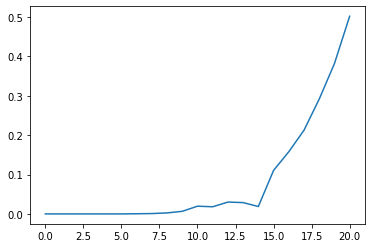

50


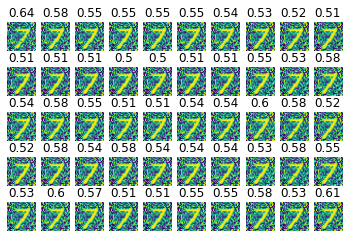

In [ ]:
myPic = X_test[34].copy()

myObj = GeneticAdversarial(model, myPic,1, 0.005, 50, 5000, 0.1, 0.3)
pop , t = myObj.main()

In [ ]:
t

121.67752575874329

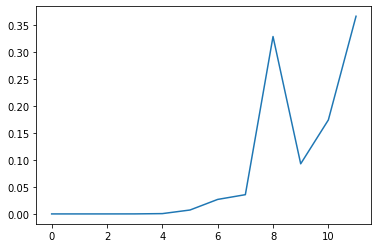

50


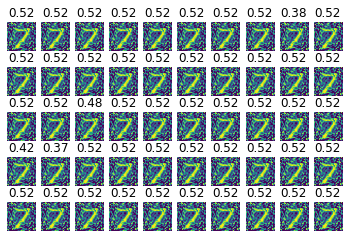

In [ ]:
myPic = X_test[34].copy()

myObj = GeneticAdversarial(model, myPic,1, 0.005, 50, 5000, 0.1, 0.1)
pop , t = myObj.main()

In [ ]:
t

69.72381663322449